In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
!pip install torchvision

In [4]:
!pip install torch-lr-finder

In [5]:
!pip install opendatasets

In [6]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 
!ls ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [11]:
from torchvision import models
import torch
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

import pathlib
import matplotlib.pyplot as plt
import torch.optim as optim
import glob
import random
from PIL import Image

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
import opendatasets as od
import random
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['all', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
# od.download('https://www.kaggle.com/gndctrl2mjrtm/auvsi-suas-dataset')

In [13]:
# /content/auvsi-suas-dataset/generated_data/generated_data/letters/A

In [14]:
alpha_numeric = glob.glob("/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/*")
print(alpha_numeric)

all = []
for filename in tqdm(alpha_numeric):
  # glob.glob("/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/*")
  li = glob.glob(filename+"/*")
  # print(len(li))
  all.extend(li)
# all = list(set(all))
random.Random(4).shuffle(all)
print(all[:5])
# all = all[:1500]
len_all = len(all)
train_list = all[:int(len_all*0.8)]
valid_list = all[int(len_all*0.8):int(len_all*0.8)+int(len_all*0.1)]
test_list = all[int(len_all*0.8)+int(len_all*0.1):]

print(len(train_list))
print(len(valid_list))
print(len(test_list))

['/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/0', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/1', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/2', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/3', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/4', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/5', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/6', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/7', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/8', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/9', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/A', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/B', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/C', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/D', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrien

100%|██████████| 36/36 [00:00<00:00, 169.67it/s]

['/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/8/8_octagon_black_blue_0.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/P/P_semicircle_black_orange_3.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/5/5_semicircle_black_blue_5.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/J/J_quartercircle_black_blue_1.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/K/K_triangle_black_orange_5.png']
4492
561
563


In [15]:
# file_train_list = open("/content/drive/MyDrive/SyntheticData/train_list.txt", "r")
# train_list = file_train_list.readlines()
# for i in range(len(train_list)):
#   train_list[i] = train_list[i].strip("\n")



# file_valid_list = open("/content/drive/MyDrive/SyntheticData/valid_list.txt", "r")
# valid_list = file_valid_list.readlines()
# for i in range(len(valid_list)):
#   valid_list[i] = valid_list[i].strip("\n")


# file_test_list = open("/content/drive/MyDrive/SyntheticData/test_list.txt", "r")
# test_list = file_test_list.readlines()
# for i in range(len(test_list)):
#   test_list[i] = test_list[i].strip("\n")

In [16]:
# file_selected = open("/content/drive/MyDrive/SyntheticData/noisy2_FinalDataset_names.txt", "r")
# selected_list = file_selected.readlines()
# selected_list = [x.strip("\n") for x in selected_list]

# random.shuffle(selected_list)
# train_list = selected_list[:40000]
# valid_list = selected_list[40000:45000]
# test_list = selected_list[45000:]

In [17]:
print(train_list[:10])
print(len(train_list))
print(valid_list[:10])
print(len(valid_list))
print(test_list[:10])
print(len(test_list))

['/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/8/8_octagon_black_blue_0.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/P/P_semicircle_black_orange_3.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/5/5_semicircle_black_blue_5.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/J/J_quartercircle_black_blue_1.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/K/K_triangle_black_orange_5.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/V/V_trapezoid_black_orange_4.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/I/I_semicircle_black_orange_2.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/V/V_square_black_orange_2.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/T/T_heptagon_black_orange_4.png', '/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/L/L_semicircle_black_blue_5.png']
4492
['/content/drive/MyDr

In [18]:
# Data transforms (normalization & data augmentation)

stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
img_size = 224
train_tfms = tt.Compose([tt.Resize((img_size,img_size)),
                         tt.RandomAffine(degrees = 30, translate = (0.3, 0.3)),
                         tt.RandomCrop(img_size, padding=4, padding_mode='reflect'),                       
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.Resize((img_size,img_size)),
                         tt.RandomAffine(degrees = 30, translate = (0.3, 0.3)),
                         tt.RandomCrop(img_size, padding=4, padding_mode='reflect'),                       
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
#data_dir = pathlib.Path('/content/intel-image-classification')
# PyTorch datasets
# train_ds = ImageFolder(train_list, train_tfms)
# valid_ds = ImageFolder(valid_list, valid_tfms)

In [19]:
from google.colab.patches import cv2_imshow

class dataset(torch.utils.data.Dataset):
    def __init__(self,file_list,transform):
        self.file_list = file_list
        self.transform = transform

    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength

    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        filename = img_path.split("/")[-1]
        double__present = False
        ch = None
        label = None
   
        letter_color, shape_color = filename.split("_")[2:4]
        color_value = {"white":0, "black":1, "gray":2, "red":3, "blue":4, "green":5, 
                        "yellow":6, "purple":7, "brown":8, "orange":9}
     
        if letter_color in color_value:
          letter_color_value = color_value[letter_color]
        else:
          letter_color_value = 10 # anomaly
        
        if shape_color in color_value:
          shape_color_value = color_value[shape_color]
        else:
          shape_color_value = 10 # anomaly
        return img_transformed, letter_color_value, shape_color_value

In [20]:
train_dataset = dataset(train_list, train_tfms)
val_dataset = dataset(valid_list, valid_tfms)
test_dataset = dataset(test_list, valid_tfms)

In [21]:
# train_list[0]

In [22]:
# train_dataset[0]

In [23]:
batch_size = 128
train_dl      = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=2)
valid_dl      = torch.utils.data.DataLoader(val_dataset  , batch_size=batch_size, num_workers=2)
test_dl       = torch.utils.data.DataLoader(test_dataset , batch_size=batch_size, num_workers=2)

In [24]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
       

In [25]:
import torch.nn as nn
import torch.nn.functional as F

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels_1, labels_2 = batch
        images, labels_1, labels_2 = images.to(device), labels_1.to(device), labels_2.to(device)
        out1, out2 = self(images)                  # Generate predictions
        loss1 = F.cross_entropy(out1, labels_1)  # Calculate loss
        loss2 = F.cross_entropy(out2, labels_2)  # Calculate loss
        loss = 0.5*loss1 + 0.5*loss2
        return loss

    def validation_step(self, batch):
        images, labels_1, labels_2 = batch
        images, labels_1, labels_2 = images.to(device), labels_1.to(device), labels_2.to(device)
        out1, out2 = self(images)                    # Generate predictions
        loss1 = F.cross_entropy(out1, labels_1)   # Calculate loss
        loss2 = F.cross_entropy(out2, labels_2)   # Calculate loss
        loss = 0.5*loss1 + 0.5*loss2
        acc1 = accuracy(out1, labels_1)           # Calculate accuracy
        acc2 = accuracy(out2, labels_2)           # Calculate accuracy
        acc = 0.5*acc1 + 0.5*acc2
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}],{} train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, "last_lr: {:.5f},".format(result['lrs'][-1]) if 'lrs' in result else '', 
            result['train_loss'], result['val_loss'], result['val_acc']))
            
 # --------------------------------------------------------------------------#
 
from torchvision import models


import copy
class COLOR(ImageClassificationBase):
    def __init__(self, original_model):
        super().__init__()
        self.feature0 = original_model.features[0]
        self.feature1 = original_model.features[1]
        self.feature2 = original_model.features[2]
        self.feature3 = original_model.features[3]
        self.feature4 = original_model.features[4]
        self.feature5 = original_model.features[5]
        self.feature6 = original_model.features[6]
        self.feature7 = original_model.features[7]
        self.feature8 = original_model.features[8]
        self.fc1 = nn.Linear(576, 100)
        self.fc2 = nn.Linear(100, 10)
        self.classifier1 = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(576, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(100, 10),
            nn.ReLU(inplace=True)
        )
        self.classifier2 = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(576, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(100, 10),
            nn.ReLU(inplace=True)
        )

        
    def forward(self, x):
        # print(self.features)
        x = self.feature0(x)
        x = self.feature1(x)
        x = self.feature2(x)
        x = self.feature3(x)
        x = self.feature4(x)
        x4 = x.clone().detach()
        # print(x4.shape)
        x = self.feature5(x)
        x = self.feature6(x)
        x = self.feature7(x)
        x7 = x.clone().detach()
        # print(x7.shape)
        global_avg_pool_4 = nn.AvgPool2d(27, stride = 1)
        global_avg_pool_7 = nn.AvgPool2d(13, stride = 1)
        x4 = global_avg_pool_4(x4)
        x7 = global_avg_pool_7(x7)
        # print(x4.shape)
        # print(x7.shape)
        x4 = torch.squeeze(x4)
        x7 = torch.squeeze(x7)
        # print(x4.shape)
        # print(x7.shape)
        concat_x4_x7 = torch.cat([x4, x7], axis=1)
        out1 = self.classifier1(concat_x4_x7)
        out2 = self.classifier2(concat_x4_x7)
        return out1, out2

In [26]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=True, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [27]:
alexnet = models.alexnet(pretrained=True)
mymodel = COLOR(alexnet)

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device : ", device)
mymodel.to(device)

device :  cpu


COLOR(
  (feature0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (feature1): ReLU(inplace=True)
  (feature2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (feature3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (feature4): ReLU(inplace=True)
  (feature5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (feature6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (feature7): ReLU(inplace=True)
  (feature8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=576, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (classifier1): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=576, out_features=100, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=100, out_features=10, bias=True)
    (5): 

In [29]:
# from torch_lr_finder import LRFinder

# model = mymodel
# criterion = nn.CrossEntropyLoss()
# # optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
# optimizer = torch.optim.SGD(model.parameters(), 0.001, weight_decay=0)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(train_dl, end_lr=100, num_iter=100)
# lr_finder.plot() # to inspect the loss-learning rate graph
# lr_finder.reset() # to reset the model and optimizer to their initial state

In [30]:
# epochs = 10
# lr = 0.1

In [31]:
# history1 = fit(epochs,lr,mymodel,train_dl,valid_dl)

In [32]:
# print(history1)

In [33]:
# li1 = []
# li2 = []
# li3 = []
# for dict1 in history1:
#     li1.append(dict1["val_loss"])
#     li2.append(dict1["val_acc"])
#     li3.append(dict1["train_loss"])

# fig =plt.figure(figsize=(15, 6))

# plt.subplot(1, 3, 1)
# plt.plot(range(1,epochs+1), li1)
# plt.plot(range(1,epochs+1), li3)
# plt.title("losses vs epochs")
# plt.legend(["val_loss","train_loss"])


# plt.subplot(1, 3, 2)
# plt.plot(range(1,epochs+1), li2)
# plt.title("val_acc vs epochs")

# plt.show()

In [34]:
epoch2 = 10
lr = 0.01

In [35]:
history2 = fit_one_cycle(epoch2,lr,mymodel,train_dl,valid_dl)

  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [0],last_lr: 0.00272, train_loss: 1.2549, val_loss: 0.1230, val_acc: 0.9933


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [1],last_lr: 0.00756, train_loss: 0.0390, val_loss: 0.0002, val_acc: 1.0000


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [2],last_lr: 0.01000, train_loss: 0.0035, val_loss: 0.0001, val_acc: 1.0000


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [3],last_lr: 0.00950, train_loss: 0.0026, val_loss: 0.0001, val_acc: 1.0000


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [4],last_lr: 0.00812, train_loss: 0.0024, val_loss: 0.0001, val_acc: 1.0000


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [5],last_lr: 0.00611, train_loss: 0.0015, val_loss: 0.0001, val_acc: 1.0000


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [6],last_lr: 0.00389, train_loss: 0.0017, val_loss: 0.0001, val_acc: 1.0000


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [7],last_lr: 0.00188, train_loss: 0.0017, val_loss: 0.0000, val_acc: 1.0000


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [8],last_lr: 0.00050, train_loss: 0.0011, val_loss: 0.0001, val_acc: 1.0000


  0%|          | 0/36 [00:00<?, ?it/s]

Epoch [9],last_lr: 0.00000, train_loss: 0.0014, val_loss: 0.0000, val_acc: 1.0000


In [36]:
print(history2)

[{'val_loss': 0.12302039563655853, 'val_acc': 0.9932716488838196, 'train_loss': 1.2548537254333496, 'lrs': [0.0003999999999999993, 0.0004020687701104062, 0.0004082732971875582, 0.0004186082330063876, 0.00043306466898092484, 0.0004516301438434057, 0.0004742886543857086, 0.0005010206692539383, 0.0005318031457841963, 0.0005666095498650797, 0.0006054098788097519, 0.0006481706872178781, 0.0006948551158051548, 0.0007454229231755472, 0.0007998305205088735, 0.0008580310091338261, 0.0009199742209540368, 0.000985606761692355, 0.001054872056916057, 0.001127710400803287, 0.0012040590076087439, 0.0012838520657842047, 0.001367020794707267, 0.0014534935039693785, 0.0015431956551720891, 0.0016360499261782128, 0.0017319762777625487, 0.0018308920226046965, 0.0019327118965644964, 0.002037348132178667, 0.0021447105343152407, 0.0022547065579206684, 0.002367241387792495, 0.0024822180203088774, 0.002599537347044505, 0.0027190982402008285]}, {'val_loss': 0.0002114996314048767, 'val_acc': 1.0, 'train_loss': 0.

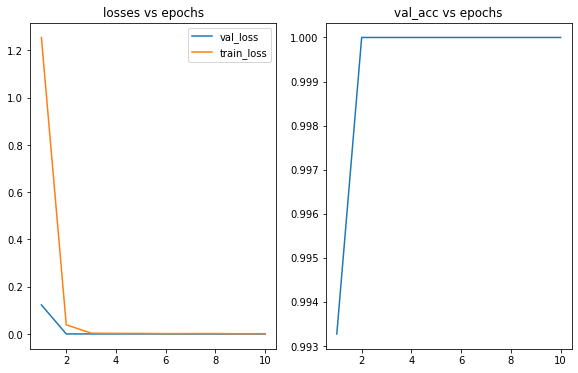

In [37]:
li1 = []
li2 = []
li3 = []
for dict1 in history2:
    li1.append(dict1["val_loss"])
    li2.append(dict1["val_acc"])
    li3.append(dict1["train_loss"])

fig =plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1,epoch2+1), li1)
plt.plot(range(1,epoch2+1), li3)
plt.title("losses vs epochs")
plt.legend(["val_loss","train_loss"])


plt.subplot(1, 3, 2)
plt.plot(range(1,epoch2+1), li2)
plt.title("val_acc vs epochs")

plt.show()

In [38]:
test_list_sample = test_list[:100]

In [39]:
for filename in test_list_sample:
    sample_image = Image.open(filename)
    sample_tensor = valid_tfms(sample_image)
    sample_tensor = sample_tensor.unsqueeze(0)
    sample_tensor = sample_tensor.to(device)
    output = mymodel(sample_tensor)
    #print(output)
    output = output.to("cpu").detach().numpy()
    #print(output)
    index = output[0].argmax()
    if index == 0:
        print("A")
    elif index == 1:
        print("B")
    elif index == 2:
        print("C")
    elif index == 3:
        print("D")
    elif index == 4:
        print("E")
    elif index == 5:
        print("F")
    elif index == 6:
        print("G")
    elif index == 7:
        print("H")
    elif index == 8:
        print("I")
    elif index == 9:
        print("J")
    elif index == 10:
        print("K")
    elif index == 11:
        print("L")
    elif index == 12:
        print("M")
    elif index == 13:
        print("N")
    elif index == 14:
        print("O")
    elif index == 15:
        print("P")
    elif index == 16:
        print("Q")
    elif index == 17:
        print("R")
    elif index == 18:
        print("S")
    elif index == 19:
        print("T")
    elif index == 20:
        print("U")
    elif index == 21:
        print("V")
    elif index == 22:
        print("W")
    elif index == 23:
        print("X")
    elif index == 24:
        print("Y")
    elif index == 25:
        print("Z")
    elif index == 26:
        print("0")
    elif index == 27:
        print("1")
    elif index == 28:
        print("2")
    elif index == 29:
        print("3")
    elif index == 30:
        print("4")
    elif index == 31:
        print("5")
    elif index == 32:
        print("6")
    elif index == 33:
        print("7")
    elif index == 34:
        print("8")
    elif index == 35:
        print("9")
    img = mpimg.imread(filename)
    imgplot = plt.imshow(img)
    plt.show()

IndexError: ignored

In [ ]:
print(test_list[:5])

In [ ]:
our_final_output = []
actual_final_output = []
for filename in tqdm(test_list):
    sample_image = Image.open(filename)
    sample_tensor = valid_tfms(sample_image)
    sample_tensor = sample_tensor.unsqueeze(0)
    sample_tensor = sample_tensor.to(device)
    output = mymodel(sample_tensor)
    #print(output)
    output = output.to("cpu").detach().numpy()
    #print(output)
    index = output[0].argmax()
    our_final_output.append(index)
    label = filename.split('/')[-1].split('.')[0]
    ch = None
    double__present = False
    for i in range(len(label)-2):
        # print(label)
        if label[i] == '_' and label[i+2] == "_":
            ch = label[i+1]
            double__present = True
            if ch == "A":
                actual_final_output.append(0)
            elif ch == "B":
                actual_final_output.append(1)
            elif ch == "C":
                actual_final_output.append(2)
            elif ch == "D":
                actual_final_output.append(3)
            elif ch == "E":
                actual_final_output.append(4)
            elif ch == "F":
                actual_final_output.append(5)
            elif ch == "G":
                actual_final_output.append(6)
            elif ch == "H":
                actual_final_output.append(7)
            elif ch == "I":
                actual_final_output.append(8)
            elif ch == "J":
                actual_final_output.append(9)
            elif ch == "K":
                actual_final_output.append(10)
            elif ch == "L":
                actual_final_output.append(11)
            elif ch == "M":
                actual_final_output.append(12)
            elif ch == "N":
                actual_final_output.append(13)
            elif ch == "O":
                actual_final_output.append(14)
            elif ch == "P":
                actual_final_output.append(15)
            elif ch == "Q":
                actual_final_output.append(16)
            elif ch == "R":
                actual_final_output.append(17)
            elif ch == "S":
                actual_final_output.append(18)
            elif ch == "T":
                actual_final_output.append(19)
            elif ch == "U":
                actual_final_output.append(20)
            elif ch == "V":
                actual_final_output.append(21)
            elif ch == "W":
                actual_final_output.append(22)
            elif ch == "X":
                actual_final_output.append(23)
            elif ch == "Y":
                actual_final_output.append(24)
            elif ch == "Z":
                actual_final_output.append(25)
            elif ch == "0":
                actual_final_output.append(26)
            elif ch == "1":
                actual_final_output.append(27)
            elif ch == "2":
                actual_final_output.append(28)
            elif ch == "3":
                actual_final_output.append(29)
            elif ch == "4":
                actual_final_output.append(30)
            elif ch == "5":
                actual_final_output.append(31)
            elif ch == "6":
                actual_final_output.append(32)
            elif ch == "7":
                actual_final_output.append(33)
            elif ch == "8":
                actual_final_output.append(34)
            elif ch == "9":
                actual_final_output.append(35)
    if double__present == False:
      actual_final_output.append(36)

total = 0
same = 0
for a,b in zip(our_final_output,actual_final_output):
    if a==b:
        same = same + 1
    total = total + 1
print(same)
print(total)
final_accuracy = same/total
print(final_accuracy)

In [ ]:
print(our_final_output)

In [ ]:
print(actual_final_output)

In [ ]:
torch.save(mymodel, "/content/drive/MyDrive/SyntheticData/NewDataset/alphanumeric_with_anomaly_syn_kaggle")

In [ ]:
model_loaded = torch.load("/content/mymodel")
model_loaded.eval()

In [ ]:
for filename in test_list_sample:
    sample_image = Image.open(filename)
    sample_tensor = valid_tfms(sample_image)
    sample_tensor = sample_tensor.unsqueeze(0)
    sample_tensor = sample_tensor.to(device)
    output = model_loaded(sample_tensor)
    #print(output)
    output = output.to("cpu").detach().numpy()
    #print(output)
    index = output[0].argmax()
    if index == 0:
        print("A")
    elif index == 1:
        print("B")
    elif index == 2:
        print("C")
    elif index == 3:
        print("D")
    elif index == 4:
        print("E")
    elif index == 5:
        print("F")
    elif index == 6:
        print("G")
    elif index == 7:
        print("H")
    elif index == 8:
        print("I")
    elif index == 9:
        print("J")
    elif index == 10:
        print("K")
    elif index == 11:
        print("L")
    elif index == 12:
        print("M")
    elif index == 13:
        print("N")
    elif index == 14:
        print("O")
    elif index == 15:
        print("P")
    elif index == 16:
        print("Q")
    elif index == 17:
        print("R")
    elif index == 18:
        print("S")
    elif index == 19:
        print("T")
    elif index == 20:
        print("U")
    elif index == 21:
        print("V")
    elif index == 22:
        print("W")
    elif index == 23:
        print("X")
    elif index == 24:
        print("Y")
    elif index == 25:
        print("Z")
    elif index == 26:
        print("0")
    elif index == 27:
        print("1")
    elif index == 28:
        print("2")
    elif index == 29:
        print("3")
    elif index == 30:
        print("4")
    elif index == 31:
        print("5")
    elif index == 32:
        print("6")
    elif index == 33:
        print("7")
    elif index == 34:
        print("8")
    elif index == 35:
        print("9")
    img = mpimg.imread(filename)
    imgplot = plt.imshow(img)
    plt.show()

In [ ]:
# /content/auvsi-suas-dataset/generated_data/letters/A/circle_A_0.jpg

In [ ]:
img = mpimg.imread("/content/auvsi-suas-dataset/generated_data/letters/A/circle_A_0.jpg")
imgplot = plt.imshow(img)
print(imgplot.size)
plt.show()

In [ ]:
from PIL import Image

im = Image.open('/content/auvsi-suas-dataset/generated_data/letters/A/circle_A_0.jpg')
width, height = im.size
print(width, height)

In [ ]:
from PIL import Image

im = Image.open('/content/F_circle_16.png')
width, height = im.size
print(width, height)

In [ ]:
# /content/drive/MyDrive/SyntheticData/noisy_FinalDataset/J/noisy_J_pentagon_408.png

In [ ]:
img = cv2.imread("/content/drive/MyDrive/SyntheticData/noisy_FinalDataset/J/noisy_J_pentagon_408.png")
cv2_imshow(img)

In [ ]:
print(img)

In [ ]:
train_list = []
valid_list = []
test_list  = []

letter_list = os.listdir("/content/drive/MyDrive/SyntheticData/noisy_FinalDataset")
print(letter_list)

dict1 = dict()

for alphabet in letter_list:
  li = os.listdir("/content/drive/MyDrive/SyntheticData/noisy_FinalDataset/" + alphabet)
  print(alphabet,len(li))
  dict1[alphabet] = len(li)
  for i in range(len(li)):
    li[i] = "/content/drive/MyDrive/SyntheticData/noisy_FinalDataset/" + alphabet + "/" + li[i]
  random.shuffle(li)
  length = len(li)
  train_list.extend(li[:int(length*0.7)][:100])
  valid_list.extend(li[int(length*0.7):int(length*0.7)+int(length*0.2)][:20])
  test_list.extend(li[int(length*0.7)+int(length*0.2):][:10])

random.shuffle(train_list)
random.shuffle(valid_list)
random.shuffle(test_list)

In [ ]:
dict1

In [ ]:
train_list = []
valid_list = []
test_list  = []

letter_list = os.listdir("/content/drive/MyDrive/SyntheticData/FinalDataset")
print(letter_list)

dict2 = dict()

for alphabet in letter_list:
  li = os.listdir("/content/drive/MyDrive/SyntheticData/FinalDataset/" + alphabet)
  print(alphabet,len(li))
  dict2[alphabet] = len(li)
  for i in range(len(li)):
    li[i] = "/content/drive/MyDrive/SyntheticData/FinalDataset/" + alphabet + "/" + li[i]
  random.shuffle(li)
  length = len(li)
  train_list.extend(li[:int(length*0.7)][:100])
  valid_list.extend(li[int(length*0.7):int(length*0.7)+int(length*0.2)][:20])
  test_list.extend(li[int(length*0.7)+int(length*0.2):][:10])

random.shuffle(train_list)
random.shuffle(valid_list)
random.shuffle(test_list)

In [ ]:
dict2

In [ ]:
li = dict1.keys()
print(li)

In [ ]:
li[]